## Predicting housing prices (San Fransisco)

#### Data Import and first Inspection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('housing.csv')

__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

In [4]:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Checking for duplicate entries
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [6]:
# Checking the entries that contain missing values in the column total_bedrooms
df[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [7]:
# Getting various statistical data about every column in dataframe
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# Checking stats on the column "ocean_proximity"
df.describe(include="O")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


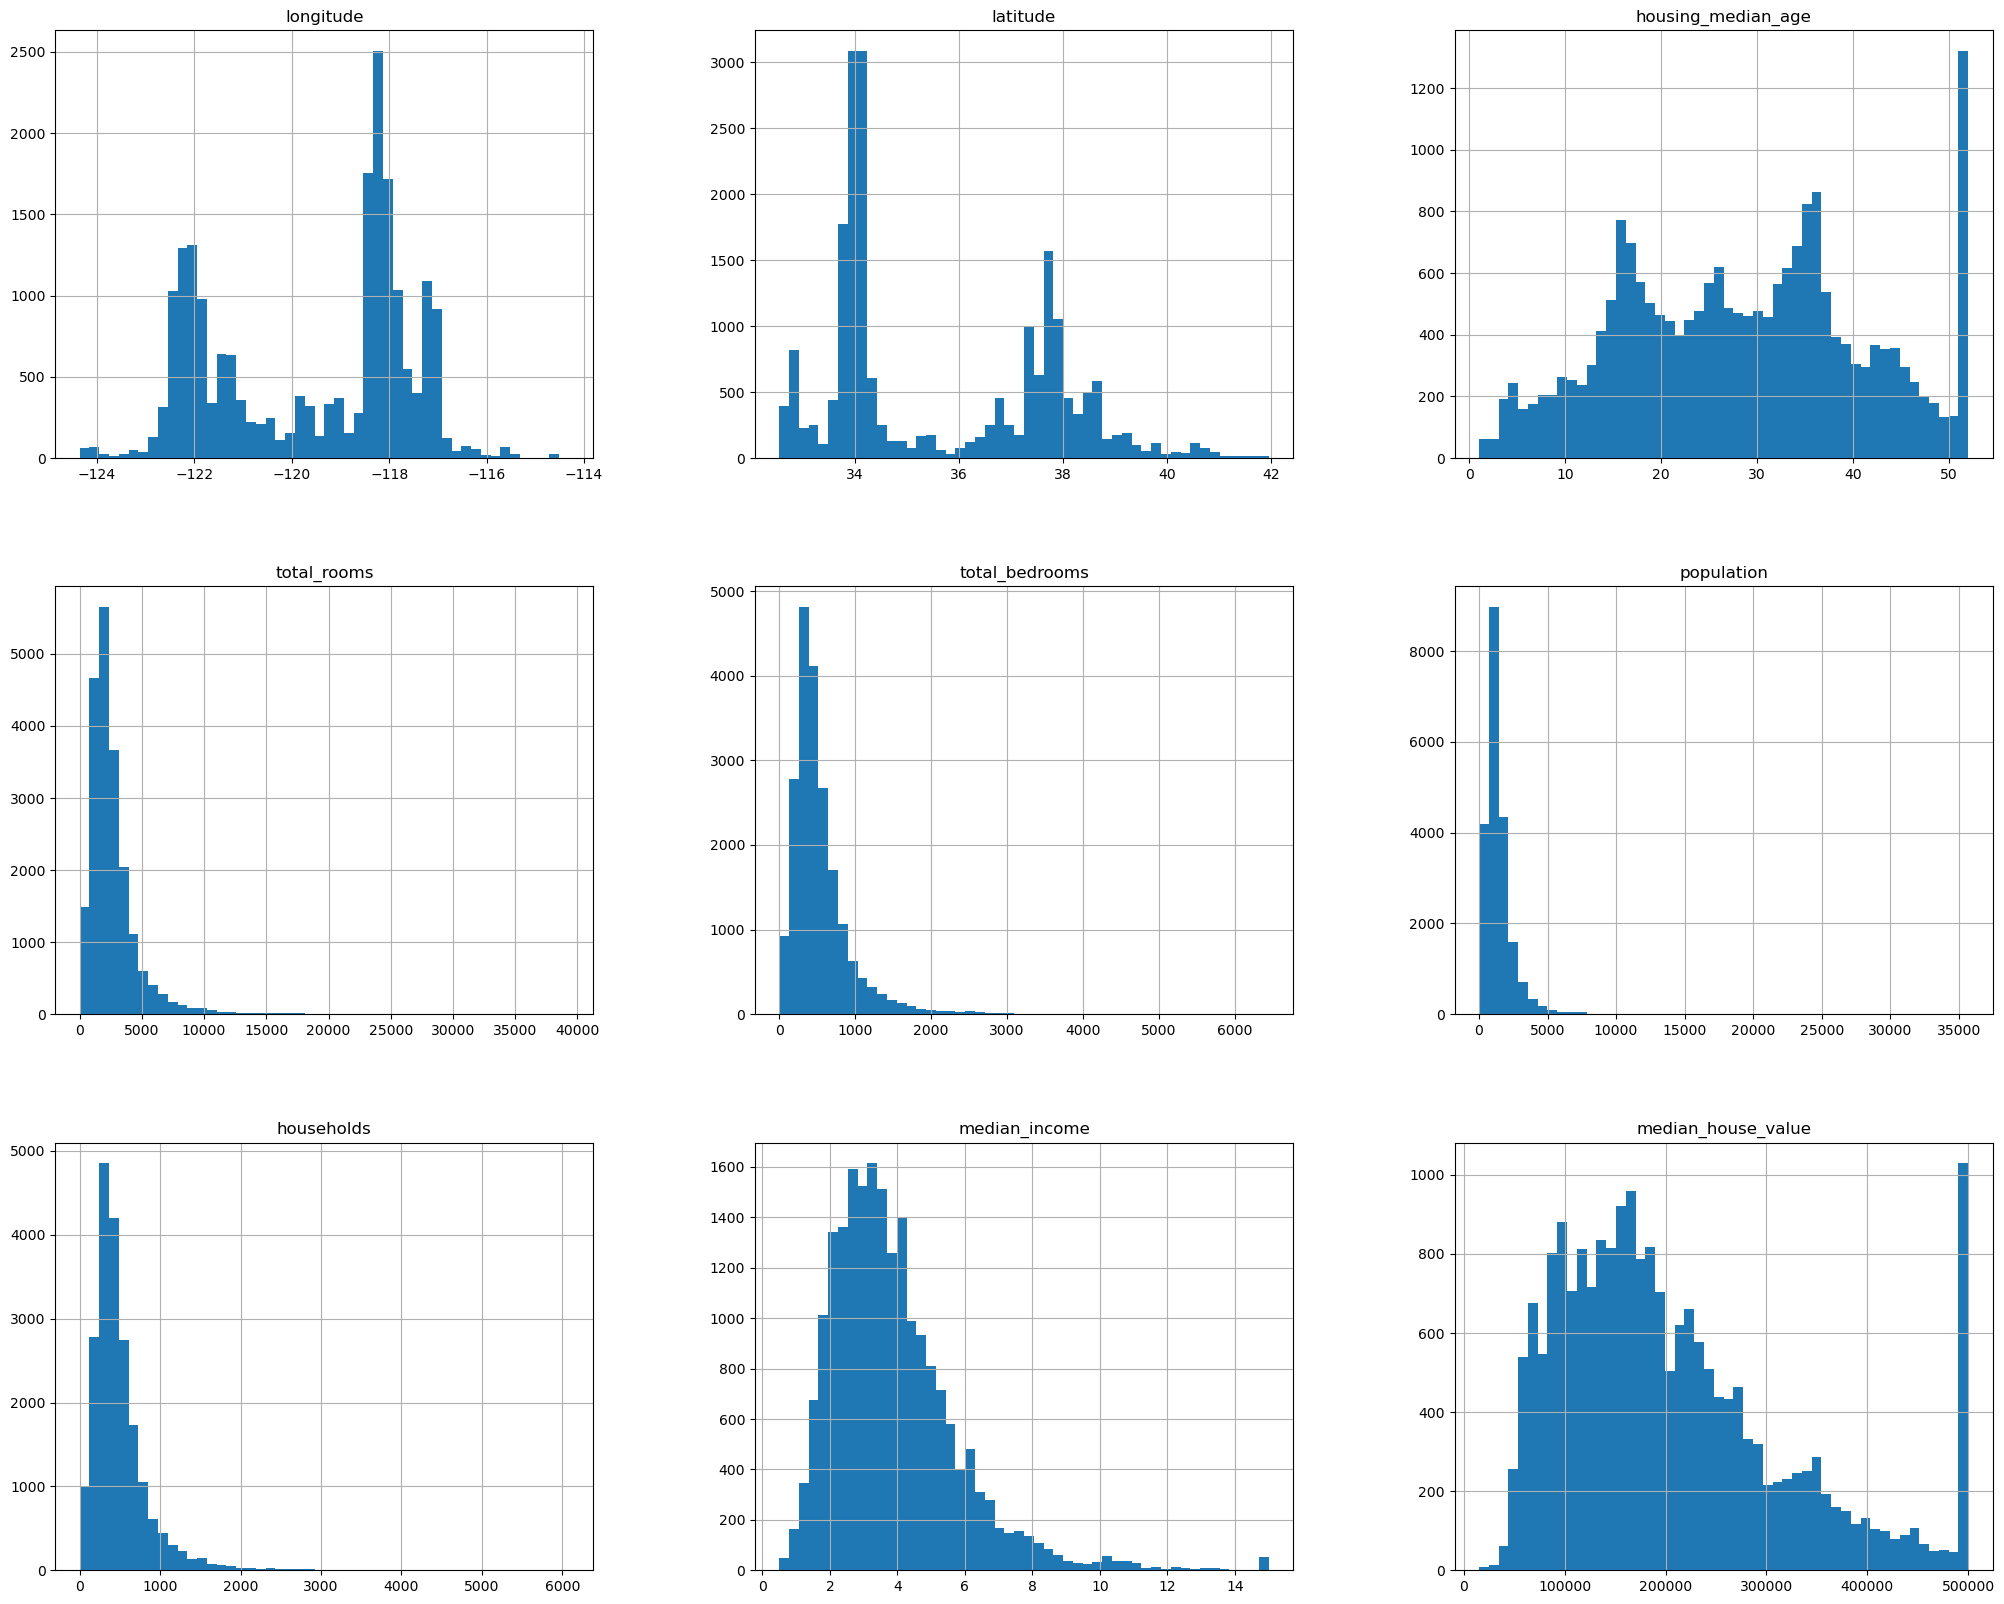

In [9]:
#Represetning data of the columns in a histogram
df.hist(bins=50, figsize=(25,20))
plt.show()

## Data Cleaning and Creating additional Features

2. __Drop__ all rows with (at least one) missing value(s).

3. __Add__ the additional Feature __"rooms_per_household"__ (should be self-explanatory)

4. __Add__ the additional Feature __"population_per_household"__ (should be self-explanatory)

5. __Add__ the additional Feature __"bedrooms_per_household"__ (should be self-explanatory)

In [10]:
df.dropna(inplace=True)

## Which Factors influence House Prices?

In [11]:
# creating new column for more clarity on the dataset and potentially find correlations
df['rooms_per_household'] = df.total_rooms.div(df.households)
df['population_per_household'] = df.population.div(df.households)
df['bedrooms_per_household'] = df.total_bedrooms.div(df.households)

In [12]:
df.rooms_per_household.nlargest(5)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
Name: rooms_per_household, dtype: float64

In [13]:
df.population_per_household.nlargest(5)

19006    1243.333333
3364      599.714286
16669     502.461538
13034     230.172414
9172       83.171429
Name: population_per_household, dtype: float64

In [14]:
df.bedrooms_per_household.nlargest(5)

1979     34.066667
1914     25.636364
11862    15.312500
12447    14.111111
9676     11.410714
Name: bedrooms_per_household, dtype: float64

#### Finding the correlation between median_house_value and other columns/features to find which factors seems to influence house prices/values

<Axes: >

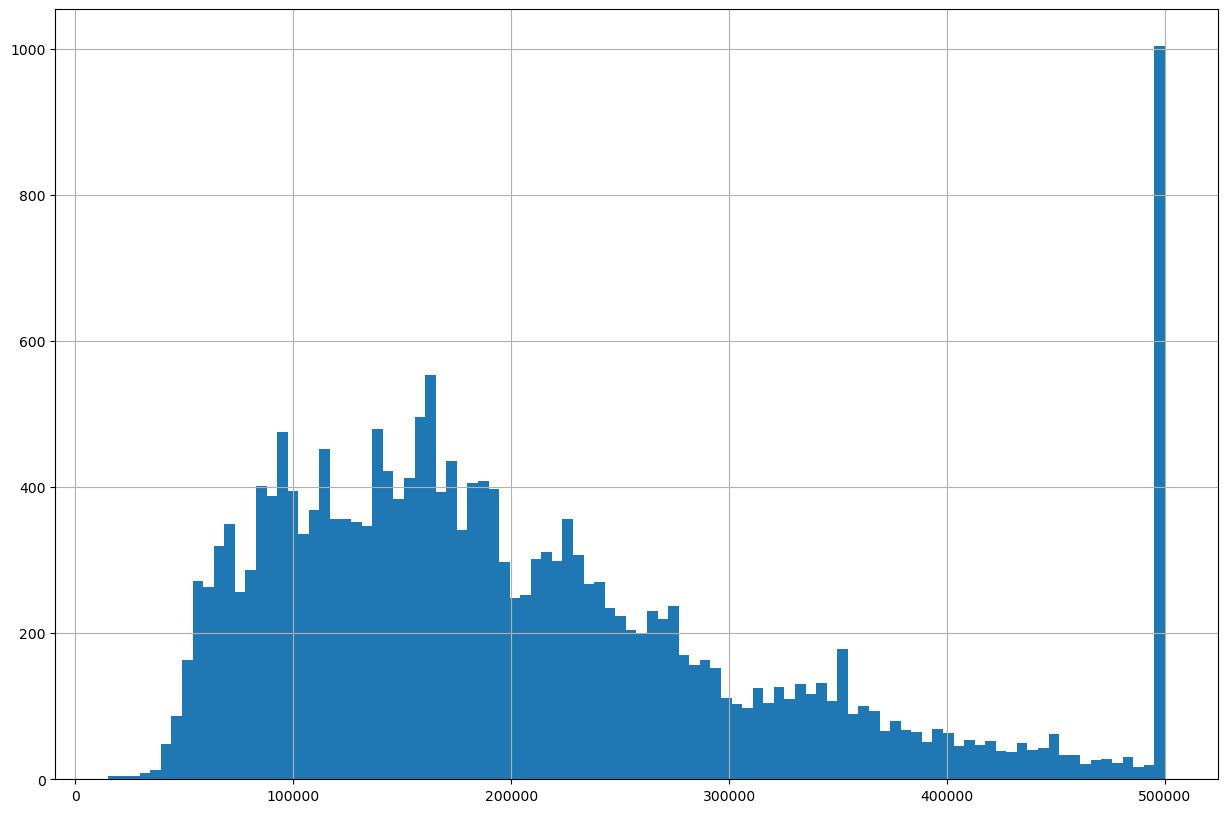

In [21]:
df.median_house_value.hist(bins=100, figsize=(15,10))

In [20]:
df.corr().median_house_value.sort_values()

/var/folders/55/gkm8c5290mq4bwpbx3mx09cw0000gn/T/ipykernel_81162/42817982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().median_house_value.sort_values()


latitude                   -0.144638
bedrooms_per_household     -0.046739
longitude                  -0.045398
population                 -0.025300
population_per_household   -0.023639
total_bedrooms              0.049686
households                  0.064894
housing_median_age          0.106432
total_rooms                 0.133294
rooms_per_household         0.151344
median_income               0.688355
median_house_value          1.000000
Name: median_house_value, dtype: float64

##### It is observed that income seems to be a strong factor that decides house value

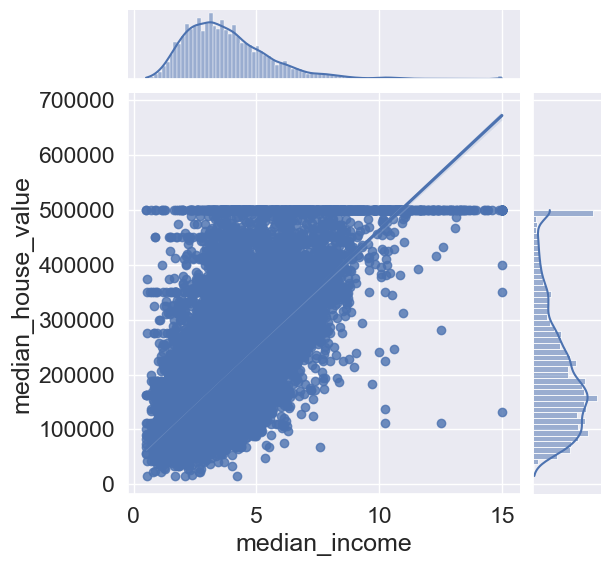

In [26]:
sns.jointplot(data = df, x = 'median_income', y = 'median_house_value', kind = 'reg')
plt.show()

#### Create a scatter plot to show the distribution of population represented by the size of each data point and colour to represent the house prize based on geographical location (longitude and latitude)

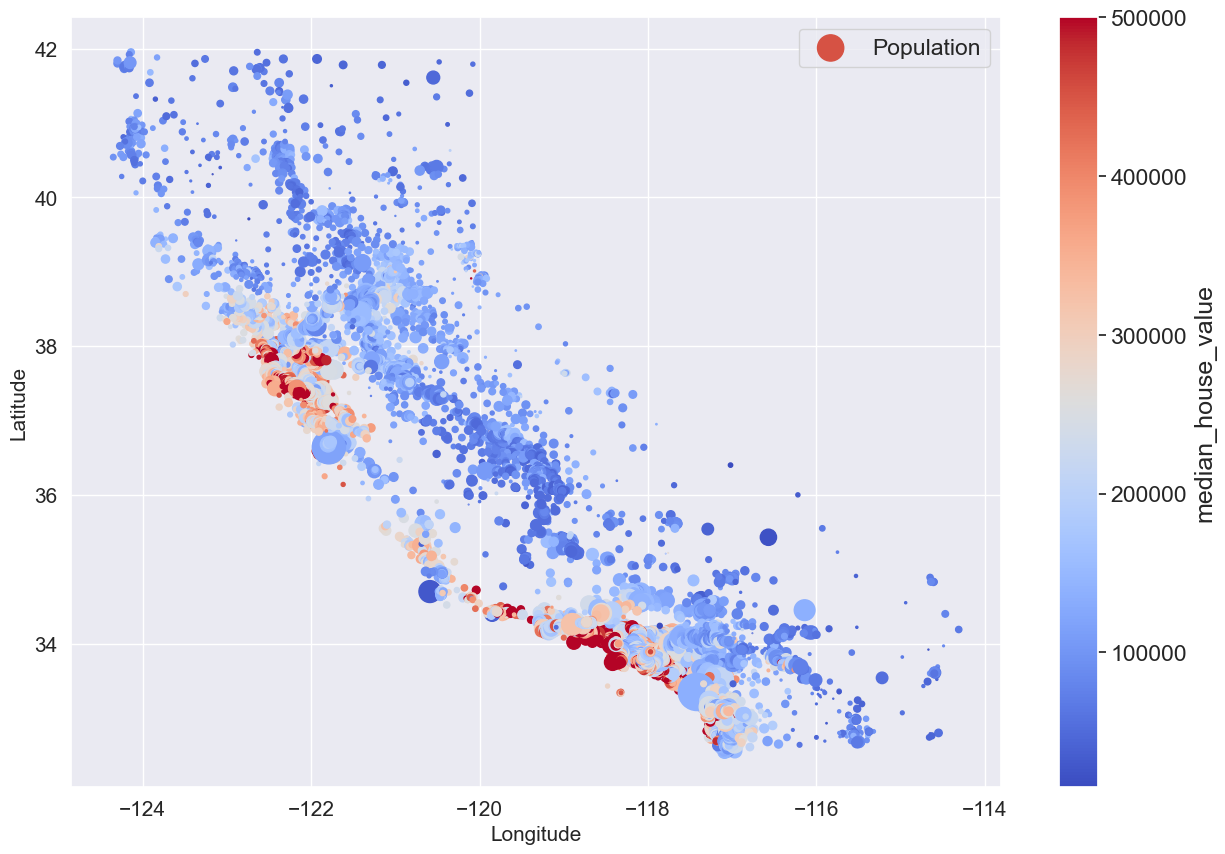

In [38]:
df.plot(kind='scatter', x = 'longitude', y = 'latitude', s=df.population/50, label='Population', c='median_house_value',
       cmap="coolwarm", colorbar=True, figsize=(15,10), fontsize=15, sharex=False)
plt.ylabel('Latitude', fontsize=15)
plt.xlabel('Longitude', fontsize=15)
plt.show()

Scatter plot resembles the state of california. Therefore, to get a better picture on how the price varies by location, we place the scatter plaot on the map of california

In [42]:
import matplotlib.image as mpimg
california_img = mpimg.imread("california.png")



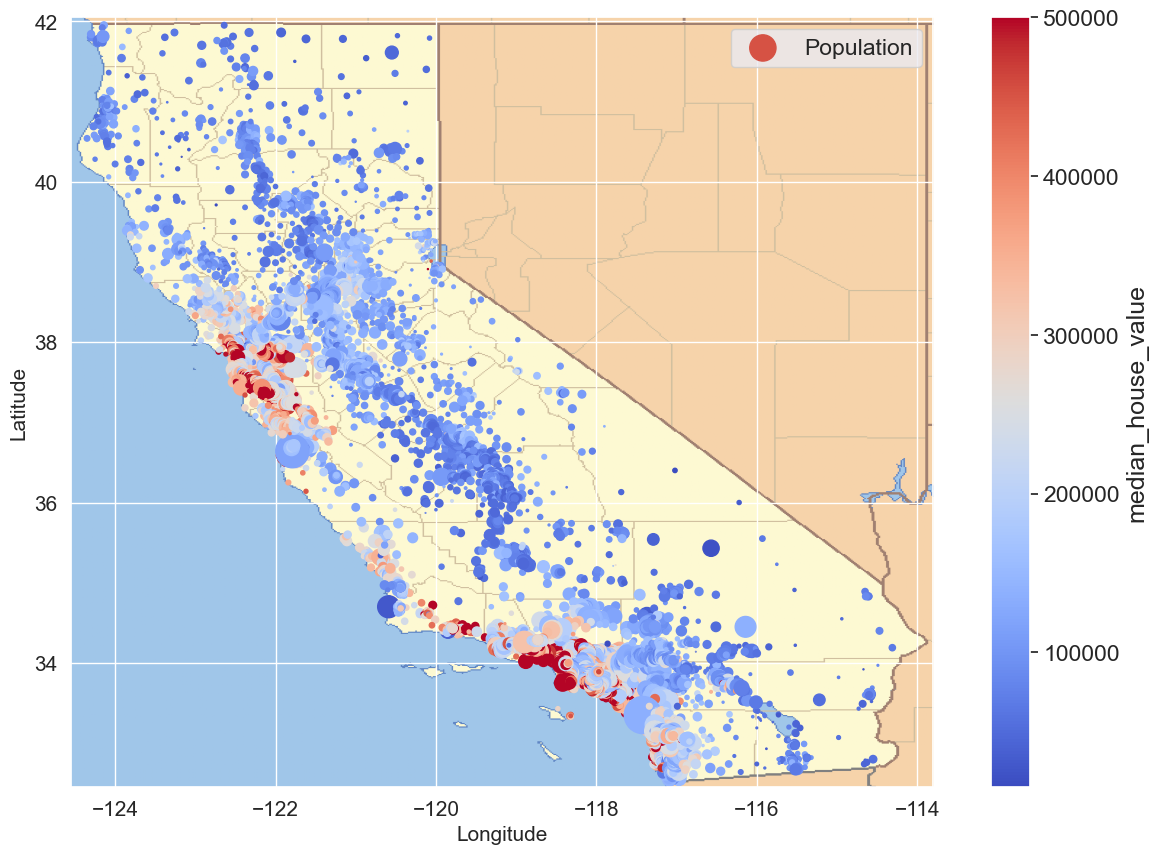

In [52]:
df.plot(kind='scatter', x = 'longitude', y = 'latitude', s=df.population/50, 
        label='Population', c='median_house_value', cmap="coolwarm", colorbar=True, 
        figsize=(15,10), fontsize=15, sharex=False)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], cmap=plt.get_cmap("jet"))

plt.ylabel('Latitude', fontsize=15)
plt.xlabel('Longitude', fontsize=15)
plt.show()

## Advanced Explanatory Data Analyis with Seaborn

10. __Add__ the additional column __"income_cat"__ with the following income categories:
- lowest 25% -> "Low"
- 25th to 50th percentile -> "Below_Average"
- 50th to 75th percentile -> "Above_Average"
- 75th to 95th percentile -> "High"
- Above 95th percentile -> "Very High"

In [60]:
df["income_category"] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1],
                                labels = ["Low", "Below_average", "Above_Average", "High", "Very High"])

In [61]:
df.income_category

0            Very High
1            Very High
2                 High
3                 High
4        Above_Average
             ...      
20635              Low
20636              Low
20637              Low
20638              Low
20639              Low
Name: income_category, Length: 20433, dtype: category
Categories (5, object): ['Low' < 'Below_average' < 'Above_Average' < 'High' < 'Very High']

In [64]:
df.income_category.value_counts(normalize=True)

Low              0.250037
Above_Average    0.250037
Below_average    0.249988
High             0.199922
Very High        0.050017
Name: income_category, dtype: float64

#### Create a graph (countplot) to show how income affects geographic location

<Axes: xlabel='income_category', ylabel='count'>

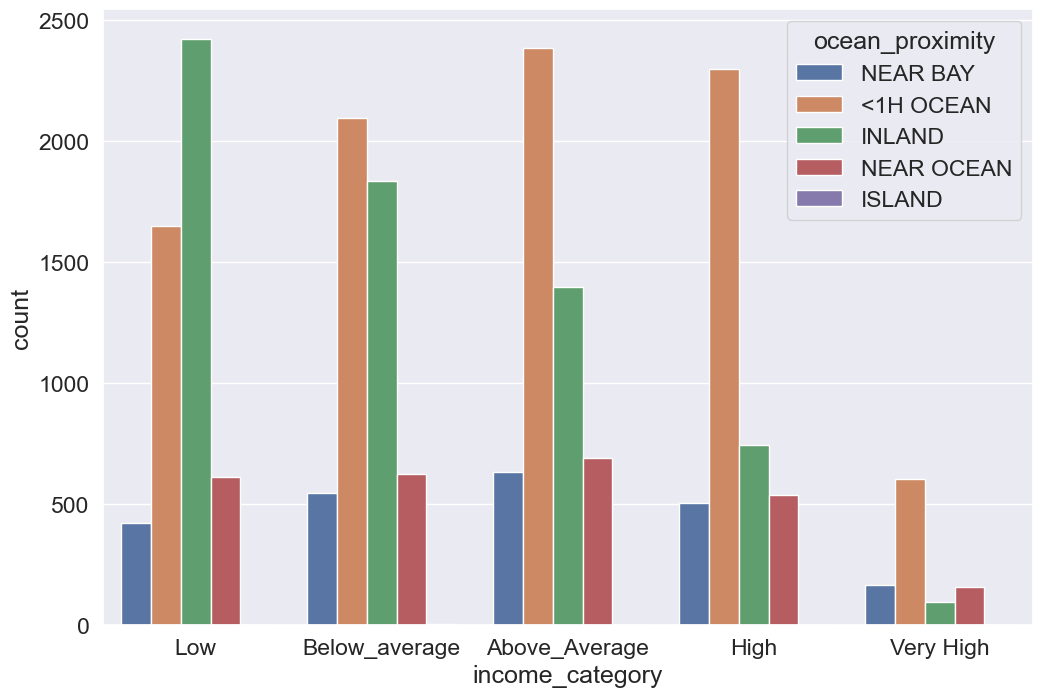

In [65]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x="income_category", hue="ocean_proximity")

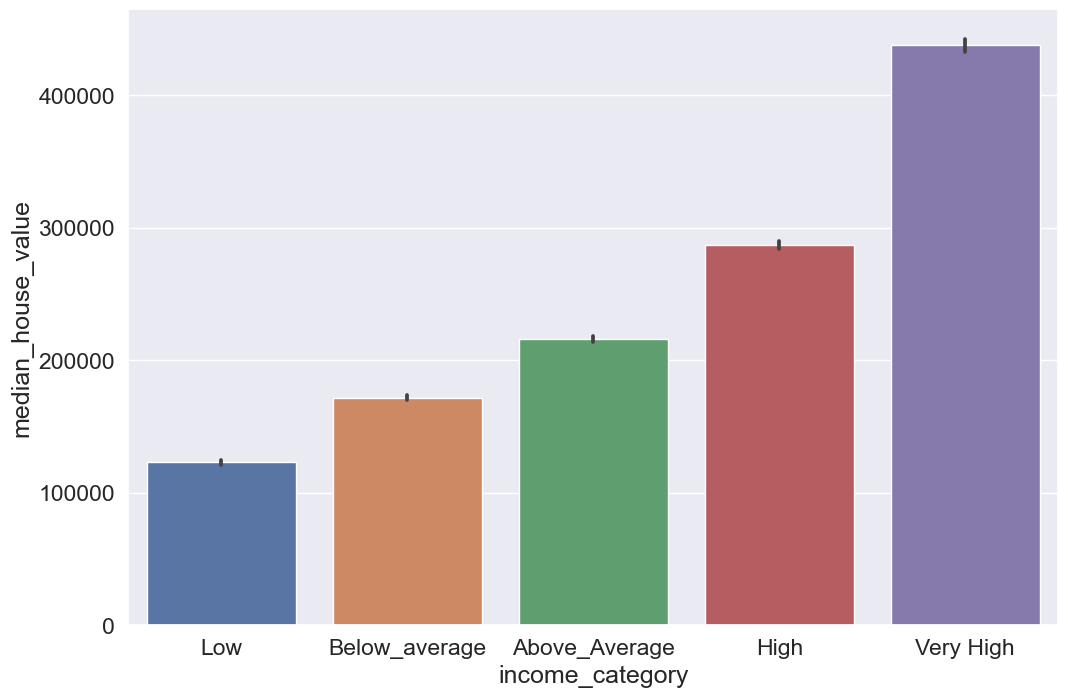

In [72]:
# Bar Plot to show the relation between median income and median house value
plt.figure(figsize=(12,8))
sns.barplot(data = df, x="income_category", y="median_house_value")
plt.show()

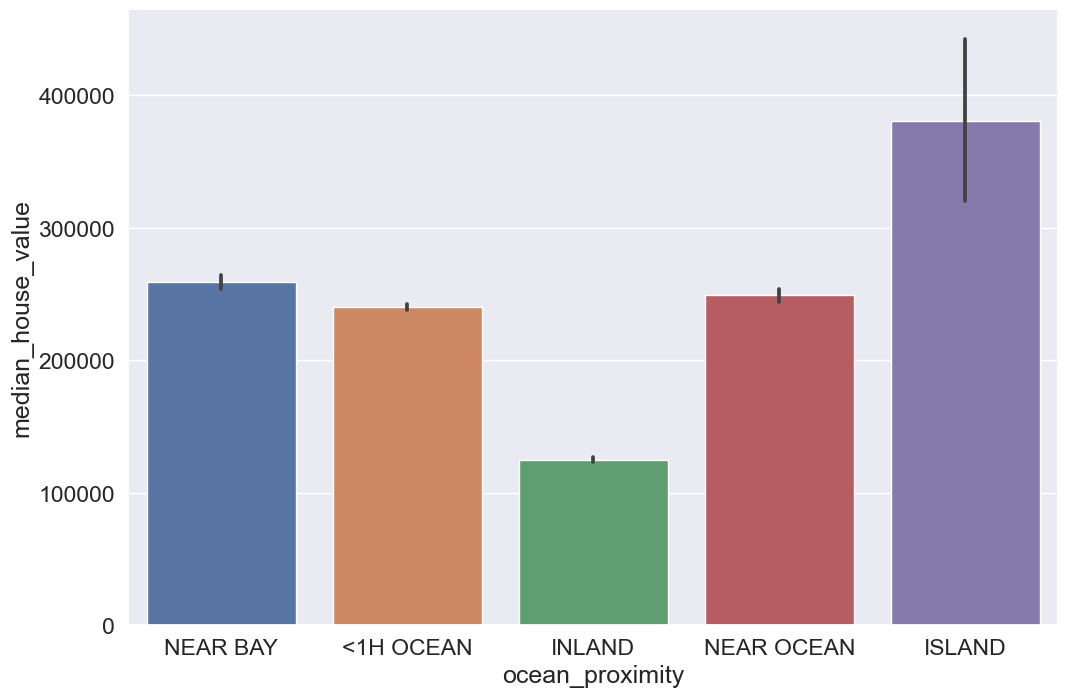

In [73]:
# Bar Plot to show the relation between location and median house value
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="ocean_proximity", y="median_house_value")
plt.show()

<Axes: xlabel='ocean_proximity', ylabel='income_category'>

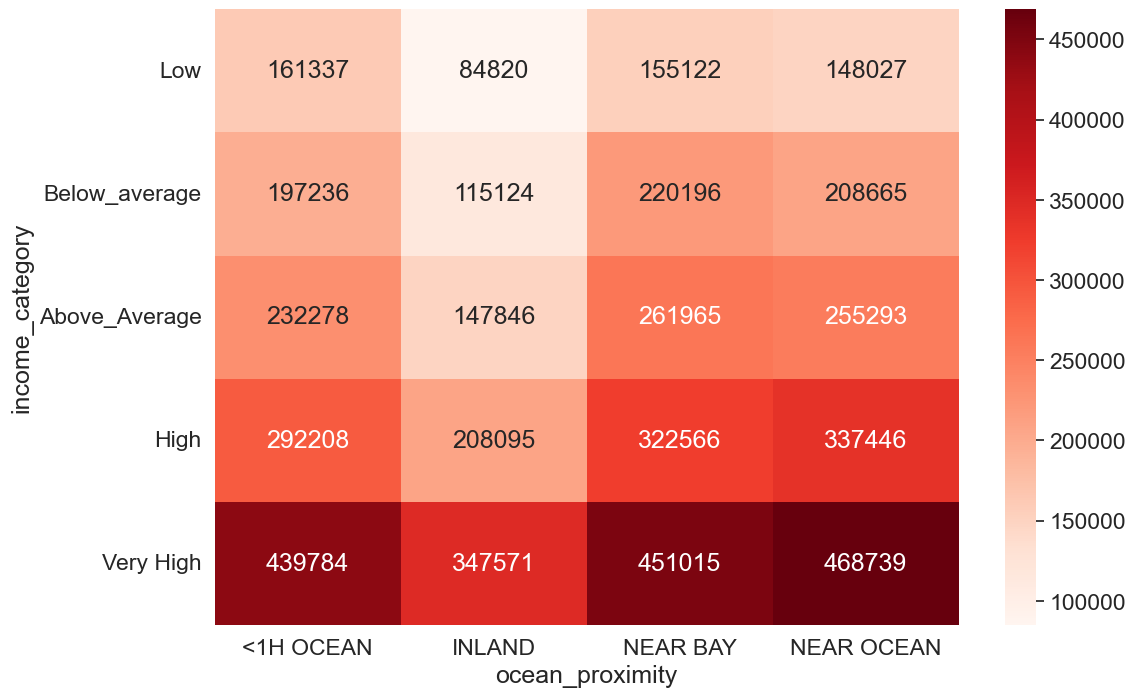

In [105]:
matrix = df.groupby(['income_category', 'ocean_proximity']).median_house_value.mean().unstack().drop(columns=("ISLAND"))
matrix
plt.figure(figsize=(12,8))
sns.heatmap(matrix.astype("int"), cmap='Reds',annot=True, fmt='d')

## Machine Learning - Predicting House Values (optional)